In [1]:
from basic_tools import *
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
h2_total=pd.read_csv(h2_total_par_filtered_path,index_col='phenotype')
h2_total.shape

(497, 7602)

# Parsing result of partitioned LDSC

In [3]:
suffix_bp_list_power="bp300 bp128 bp64 bp32 bp16 bp8".split()

In [4]:
regression_result_bp_list_dict=dict([make_regression_result_list(h2_total,phenotype,suffix_bp_list_power) for phenotype in phenotypes_par_filtered.index])

In [5]:
idx=-1
h2_df=pd.DataFrame([[phenotype]+((regression_result_list[idx]['h2']/regression_result_list[idx]['h2'].sum())/regression_result_list[idx]['category'].apply(category_to_format,args=('bp_range',))).tolist() for phenotype,regression_result_list in regression_result_bp_list_dict.items()])
h2_df=h2_df.set_index(0)

found that variables 'gwas_result_sample','chr_bp_max' were not loaded. trying to load the variables
gwas_result_sample.shape: (13294674, 19)


In [199]:
def calculate_per_bp_var(regression_result_list_dict,suffix_list,mode='default'):
    var_list=[]
    for idx,value in enumerate(suffix_list):
        h2_df=pd.DataFrame([[phenotype]+((regression_result_list[idx]['h2']/regression_result_list[idx]['h2'].sum())/regression_result_list[idx]['category'].apply(category_to_format,args=('bp_range',))).tolist() for phenotype,regression_result_list in regression_result_list_dict.items()])
        #h2_df=pd.DataFrame([[phenotype]+((regression_result_list[idx]['h2']/regression_result_list[idx]['h2'].sum())/1).tolist() for phenotype,regression_result_list in regression_result_list_dict.items()])
        h2_df=h2_df.set_index(0)

        if mode=='default':
            values=h2_df.var(axis=1)
        elif mode=='mono':
            h2_mono=pd.Series(0.0,index=np.arange(h2_df.shape[1]));h2_mono[0]=1/category_to_format(list(regression_result_bp_list_dict.values())[0][idx]['category'].loc[0],'bp_range',)
            values=h2_df.var(axis=1)/h2_mono.var()
        elif mode=='max_and_poly':
            h2_mono=pd.Series(0.0,index=np.arange(h2_df.shape[1]));h2_mono[0]=1/category_to_format(list(regression_result_bp_list_dict.values())[0][idx]['category'].loc[0],'bp_range',)
            h2_poly=pd.Series(1.0,index=np.arange(h2_df.shape[1]));h2_poly=h2_poly/list(regression_result_bp_list_dict.values())[0][idx]['category'].apply(category_to_format,args=('bp_range',)).sum()
            #var_list.append(1-(h2_df.var(axis=1)-h2_poly.var())/(h2_df.var(axis=1).max()-h2_poly.var()))#-h2_df.mean(axis=1))
            values=(h2_df.var(axis=1)-0)/(h2_df.var(axis=1).max()-0)
        elif mode=='test':
            values=-np.log10(h2_df.var(axis=1))
            8.580318	
            values=(values.max()-values)
            values=1-values/values.max()
            #values=values-values.min()
            #values=1-(values-values.min())/(values.max()-values.min())
        else:
            raise
        var_list.append(values)
    var_df=pd.DataFrame(var_list,index=suffix_list)
    return var_df.T
per_bp_var=calculate_per_bp_var(regression_result_bp_list_dict,suffix_bp_list_power,mode='test')
per_bp_var.sort_values('bp8',ascending=False).head()

,bp300,bp128,bp64,bp32,bp16,bp8
0,,,,,,
6138_1,1.000000,0.917994,1.000000,1.000000,1.000000,1.000000
23115_irnt,0.885834,0.775041,0.860754,0.906893,0.971349,0.986191
2139_irnt,0.939661,0.769075,0.862561,0.891153,0.990408,0.976807
23104_irnt,0.839558,0.812932,0.897362,0.912716,0.982323,0.973433
23119_irnt,0.839601,0.770144,0.863750,0.903218,0.970287,0.972381


In [7]:
def calculate_per_bp_var(regression_result_list_dict,suffix_list,mode='default'):
    var_list=[]
    for idx,value in enumerate(suffix_list):
        h2_df=pd.DataFrame([[phenotype]+((regression_result_list[idx]['h2']/regression_result_list[idx]['h2'].sum())/regression_result_list[idx]['category'].apply(category_to_format,args=('bp_range',))).tolist() for phenotype,regression_result_list in regression_result_list_dict.items()])
        #h2_df=pd.DataFrame([[phenotype]+((regression_result_list[idx]['h2']/regression_result_list[idx]['h2'].sum())/1).tolist() for phenotype,regression_result_list in regression_result_list_dict.items()])
        h2_df=h2_df.set_index(0)

        if mode=='default':
            values=h2_df.var(axis=1)
        elif mode=='mono':
            h2_mono=pd.Series(0.0,index=np.arange(h2_df.shape[1]));h2_mono[0]=1/category_to_format(list(regression_result_bp_list_dict.values())[0][idx]['category'].loc[0],'bp_range',)
            values=h2_df.var(axis=1)/h2_mono.var()
        elif mode=='max_and_poly':
            h2_mono=pd.Series(0.0,index=np.arange(h2_df.shape[1]));h2_mono[0]=1/category_to_format(list(regression_result_bp_list_dict.values())[0][idx]['category'].loc[0],'bp_range',)
            h2_poly=pd.Series(1.0,index=np.arange(h2_df.shape[1]));h2_poly=h2_poly/list(regression_result_bp_list_dict.values())[0][idx]['category'].apply(category_to_format,args=('bp_range',)).sum()
            #var_list.append(1-(h2_df.var(axis=1)-h2_poly.var())/(h2_df.var(axis=1).max()-h2_poly.var()))#-h2_df.mean(axis=1))
            values=(h2_df.var(axis=1)-0)/(h2_df.var(axis=1).max()-0)
        elif mode=='test':
            #values=-np.log10(h2_df.var(axis=1))
            #8.580318	
            #values=(values.max()-values)
            #values=1-values/values.max()
            values=-np.log10(h2_df.var(axis=1))
            values=(values-values.min())/(values.max()-values.min())
            #values=values-values.max()
            #values=values-values.max()
            #values=values
            #values=values-values.min()
            #values=1-(values-values.min())/(values.max()-values.min())
        else:
            raise
        var_list.append(values)
    var_df=pd.DataFrame(var_list,index=suffix_list)
    return var_df.T
per_bp_var=calculate_per_bp_var(regression_result_bp_list_dict,suffix_bp_list_power,mode='test')
per_bp_var.sort_values('bp8',ascending=False)

,bp300,bp128,bp64,bp32,bp16,bp8
0,,,,,,
6138_1,1.000000,0.917994,1.000000,1.000000,1.000000,1.000000
23115_irnt,0.885834,0.775041,0.860754,0.906893,0.971349,0.986191
2139_irnt,0.939661,0.769075,0.862561,0.891153,0.990408,0.976807
23104_irnt,0.839558,0.812932,0.897362,0.912716,0.982323,0.973433
23119_irnt,0.839601,0.770144,0.863750,0.903218,0.970287,0.972381
1180,0.834793,0.894339,0.946417,0.945027,0.998673,0.970529
23099_irnt,0.875936,0.777952,0.871800,0.912005,0.964123,0.970371
23112_irnt,0.851619,0.817062,0.900118,0.916972,0.979026,0.969683
23106_irnt,0.787170,0.925929,0.919102,0.911518,0.983901,0.964056


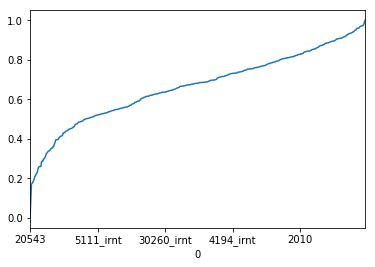

In [8]:
per_bp_var['bp8'].sort_values().plot()

In [ ]:
30100_irnt

In [38]:
temp=per_bp_var[np.logical_and.reduce([per_bp_var['bp8']>0.60,per_bp_var['bp8']<0.70,h2_total.loc[per_bp_var.index]['bp300.Total Liability scale h2']>0.2])]

In [42]:
code_to_description("5132_irnt")

'3mm strong meridian (right)'

In [41]:
temp.index#.map(code_to_description)

Index(['5099_irnt', '30100_irnt', '5132_irnt', '2395_1', '2395_4'], dtype='object', name=0)

In [34]:
h2_total.loc[per_bp_var.index]['bp300.Total Liability scale h2']>0.2

In [30]:
h2_total['bp300.Total Liability scale h2']['30100_irnt']

0.2286

In [21]:
per_bp_var.sort_values('bp8',ascending=False).iloc[275:].index.map(code_to_description)

Index(['Hair/balding pattern: Pattern 1',
       'Treatment/medication code: atenolol',
       'Illness, injury, bereavement, stress in last 2 years: Serious illness, injury or assault to yourself',
       'Mean platelet (thrombocyte) volume', 'Recent feelings of depression',
       'Non-cancer illness code, self-reported: migraine',
       'Corneal hysteresis (right)', 'Recent poor appetite or overeating',
       'FI9 : concept interpolation', 'Alcohol drinker status: Current',
       ...
       'Restless during period of worst anxiety',
       'Diagnoses - main ICD10: N39 Other disorders of urinary system',
       'Fracture resulting from simple fall',
       'Own or rent accommodation lived in: Rent - from private landlord or letting agency',
       '6mm asymmetry angle (right)', 'Age asthma diagnosed by doctor',
       'Maximum frequency of taking cannabis', 'Skin colour',
       'Average monthly red wine intake',
       'Number of things worried about during worst period of anxiet

In [13]:
per_bp_var.sort_values('bp8',ascending=False).index.map(code_to_description)[:20]

Index(['Qualifications: College or University degree',
       'Leg fat percentage (left)', 'Age first had sexual intercourse',
       'Body mass index (BMI)', 'Arm fat percentage (right)',
       'Morning/evening person (chronotype)', 'Body fat percentage',
       'Leg fat mass (right)', 'Impedance of whole body',
       'Waist circumference', 'Overall health rating', 'Weight',
       'Duration to first press of snap-button in each round',
       'Mean time to correctly identify matches', 'Impedance of arm (right)',
       'Time spent watching television (TV)', 'Plays computer games',
       'Time to complete round', 'Impedance of leg (left)',
       'Usual walking pace'],
      dtype='object', name=0)

In [17]:
h2_total['description']=h2_total.index.map(code_to_description)

In [21]:
var_and_h2=pd.concat([
    per_bp_var['bp8'],
    h2_total['uni.Total Observed scale h2'],
    h2_total['uni.Total Liability scale h2'],
    h2_total['uni.Total h2 p'],
    h2_total['description']
    ],axis=1)

In [22]:
plt.rcParams['font.family']='Arial'

In [23]:
theta_sample=2*np.pi*np.arange(0,1,0.05)
theta_sample=theta_sample[theta_sample%np.pi>np.pi/5]
theta_sample

array([0.9424778 , 1.25663706, 1.57079633, 1.88495559, 2.19911486,
       2.51327412, 2.82743339, 3.76991118, 4.08407045, 4.39822972,
       4.71238898, 5.02654825, 5.34070751, 5.65486678, 5.96902604])

https://matplotlib.org/users/annotations.html#annotating-with-text-with-box
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html

/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

Leg fat percentage [-0.75745857  0.98619075] (-0.015450849718747378, 0.04755282581475768) [-0.77290942  1.03374358]
BMI [-0.70027485  0.97343318] (0.05663118960624632, -0.04114496766047314) [-0.64364366  0.93228822]
Morning person [-1.02918839  0.97052856] (0.04045084971874737, -0.02938926261462367) [-0.98873754  0.9411393 ]
Pair-matching test delay [-1.17327748  0.95971081] (-0.04755282581475768, 0.015450849718747377) [-1.22083031  0.97516166]
Speed-limit violation [-1.33724217  0.91532792] (-0.040450849718747364, -0.02938926261462367) [-1.37769302  0.88593866]
FEV1 [-0.83209219  0.90967458] (-1.1021821192326179e-17, -0.060000000000000005) [-0.83209219  0.84967458]
PEF [-1.09963287  0.8848353 ] (-1.285879139104721e-17, -0.07) [-1.09963287  0.8148353 ]
Sitting height [-0.57642648  0.85214094] (0.05706339097770922, -0.01854101966249686) [-0.51936309  0.83359992]
Outdoor in winter [-1.49620932  0.81621278] (-0.029389262614623653, 0.04045084971874738) [-1.52559858  0.85666363]
Facial agei

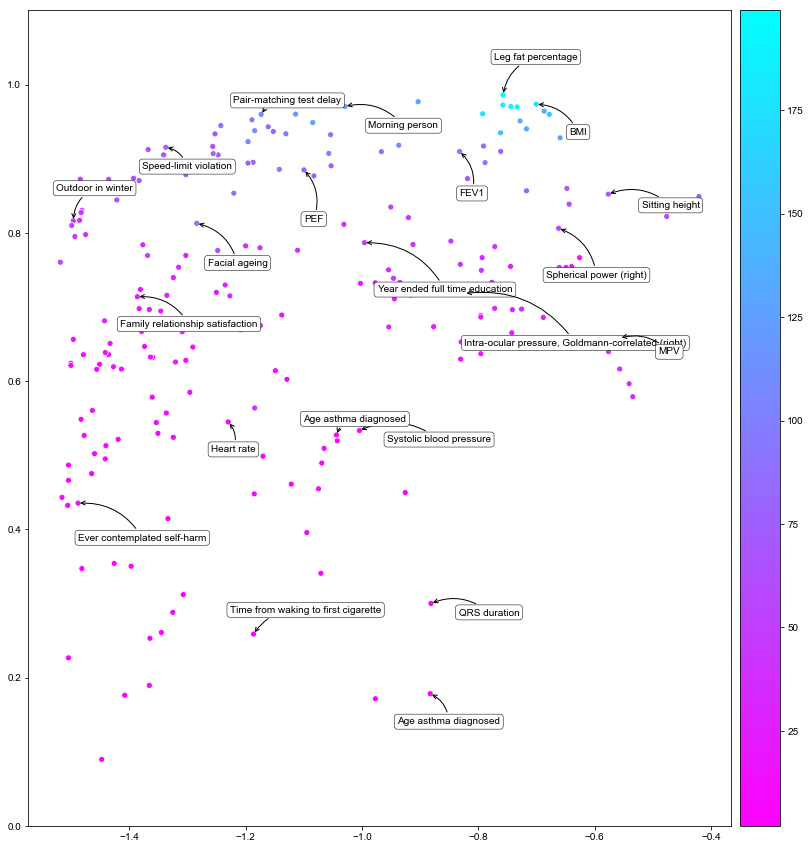

In [153]:
#phenotypes_par_filtered_description_dict=pd.read_csv(phenotypes_par_filtered_description_dict_path,sep='\t',index_col='description')

plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams['font.size']=10


#h2bin_data_toplot=h2bin_data[np.logical_and.reduce([h2bin_data['h2_liability']==h2bin_data['h2_observed'],h2bin_data['h2_liability']>0.15,h2bin_data['h2_liability']<0.3])]
var_and_h2_filtered=var_and_h2[var_and_h2['uni.Total Liability scale h2']==var_and_h2['uni.Total Observed scale h2']]

#var_and_h2_filtered=var_and_h2.copy()

var_and_h2_filtered['x_data']=np.log10(var_and_h2_filtered['uni.Total Observed scale h2'])
var_and_h2_filtered['y_data']=var_and_h2_filtered['bp8']
var_and_h2_filtered['hue_data']=-np.log10(var_and_h2_filtered['uni.Total h2 p'])
#np.log10(st.norm.sf(h2_total[idx]['{}.Total Observed scale h2'.format(suffix)]/h2_total[idx]['{}.Total Observed scale h2_se'.format(suffix)]))



points = plt.scatter(var_and_h2_filtered['x_data'],
                     var_and_h2_filtered['y_data'],
                     c=var_and_h2_filtered["hue_data"],
                     cmap="cool_r")
plt.clf()
plt.colorbar(points,orientation="vertical",pad=0.01)

plot=sns.scatterplot(var_and_h2_filtered['x_data'],var_and_h2_filtered['y_data'],hue=var_and_h2_filtered['hue_data'],palette="cool_r",
                    legend=None
                    )

dup_sort=lambda x: sorted(np.append(x,-x),key=lambda y: abs(y))

#r_sample=dup_sort(np.arange(0.04,0.071,0.005))
r_sample=np.arange(0.05,0.08,0.01)
theta_sample=2*np.pi*np.arange(0,1,0.05)
theta_sample=theta_sample[theta_sample%np.pi>np.pi/5]

np.random.shuffle(theta_sample)
move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]
#print(move_sample)
#print(move_sample)
text_plotted=pd.DataFrame([])
for idx,row in var_and_h2_filtered.sort_values('y_data',ascending=False).iterrows():
    description_short=description_to_short(row['description'],'abbr_pub')
    if type(description_short)==float:
        continue
    #plt.text(row['x_data'], row['y_data'], description_to_short(row['description'],'abbr_pub'))#, horizontalalignment='left', size='medium', color='black',)
    s=description_short
    xy=np.array([row['x_data'], row['y_data']])
    #np.random.shuffle(move_sample)
    np.random.shuffle(theta_sample)
    move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]

    for move in move_sample:
        xytext=xy+move
        #(((text_dup[0]-row['h2_liability'])**2+(5*(text_dup[1]-row['cm8']))**2)<0.0007).sum()==0:
        if text_plotted.shape[0]==0 or (((text_plotted['x']-xytext[0])**2+0.5*(text_plotted['y']-xytext[1])**2)<0.02).sum()==0:
            plt.annotate(s,xy=xy,xytext=xytext,arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=0.3"),bbox= dict(boxstyle="round,pad=0.3", fc=(1,1,1,1), ec="black", lw=0.5))
            text_plotted=text_plotted.append(pd.DataFrame([{'x':xytext[0],'y':xytext[1]}]))
            print(description_short,xy,move,xytext)
            break
        
    """
    arrowprops=dict(arrowstyle=stylename,
                patchB=p,
                shrinkA=5,
                shrinkB=5,
                fc="k", ec="k",
                connectionstyle="arc3,rad=-0.05",
                ),
    """
    """
    if (((text_plotted['x']-row[''])**2+(5*(text_dup[1]-row['cm8']))**2)<0.0007).sum()==0:
        continue
        plt.annotate(s,xy=xy,xytext=xytext,arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=-1"))
        text_dup=text_dup.append(pd.DataFrame([[row['h2_liability'], row['cm8']]]))
    """
    #plt.annotate(s,xy=xy,xytext=xytext,arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=0.3"))
    #plt.text(row['x_data'], row['y_data'],,'abbr_pub'))#, horizontalalignment='left', size='medium', color='black',)
    
"""
plt.xlabel("h2 (liability)")
plt.ylabel("corr with dummy".format(suffix))

#plt.savefig('a.png')
"""
plt.title("")
plt.xlabel("")
plt.ylabel("")

#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fontsize=10,fancybox=True, shadow=True)




plt.ylim(0,1.1)
plt.show()

In [149]:
b,m

(0.9452838434254426, 0.217743525050197)

/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

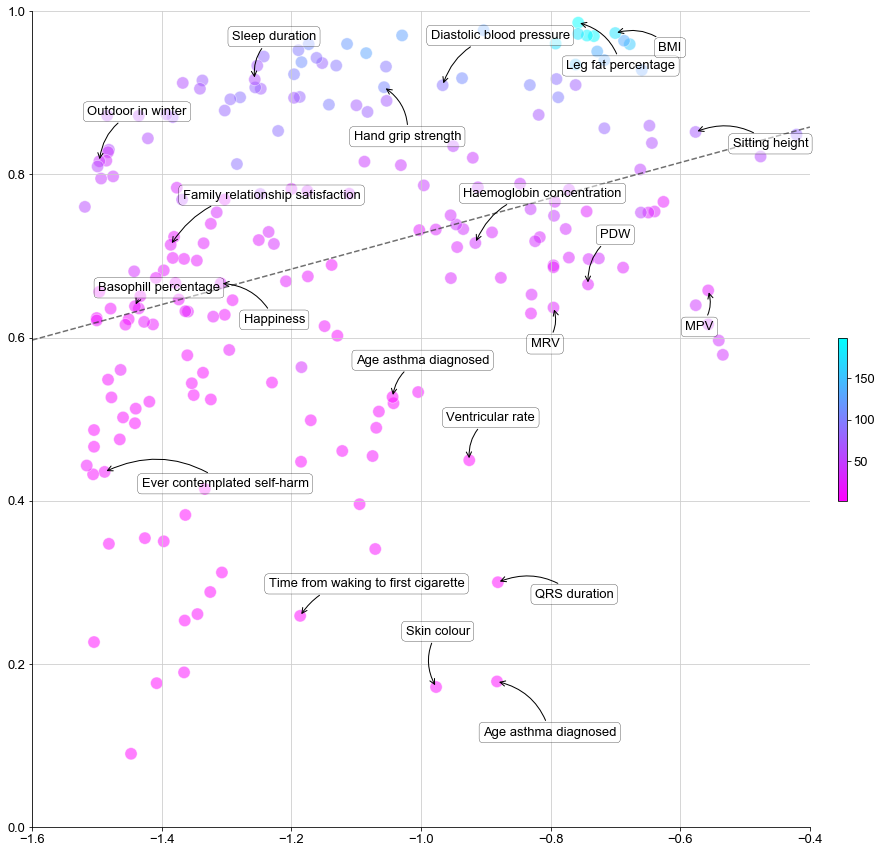

In [260]:
#phenotypes_par_filtered_description_dict=pd.read_csv(phenotypes_par_filtered_description_dict_path,sep='\t',index_col='description')
from numpy.polynomial.polynomial import polyfit

plt.rcParams["figure.figsize"] = (17,15)
plt.rcParams['font.size']=13


#h2bin_data_toplot=h2bin_data[np.logical_and.reduce([h2bin_data['h2_liability']==h2bin_data['h2_observed'],h2bin_data['h2_liability']>0.15,h2bin_data['h2_liability']<0.3])]
var_and_h2_filtered=var_and_h2[var_and_h2['uni.Total Liability scale h2']==var_and_h2['uni.Total Observed scale h2']]

#var_and_h2_filtered=var_and_h2.copy()

var_and_h2_filtered['x_data']=np.log10(var_and_h2_filtered['uni.Total Observed scale h2'])
var_and_h2_filtered['y_data']=var_and_h2_filtered['bp8']
var_and_h2_filtered['hue_data']=-np.log10(var_and_h2_filtered['uni.Total h2 p'])
#np.log10(st.norm.sf(h2_total[idx]['{}.Total Observed scale h2'.format(suffix)]/h2_total[idx]['{}.Total Observed scale h2_se'.format(suffix)]))



points = plt.scatter(var_and_h2_filtered['x_data'],
                     var_and_h2_filtered['y_data'],
                     c=var_and_h2_filtered["hue_data"],
                     cmap="cool_r")
plt.clf()
plt.colorbar(points,orientation="vertical",pad=0.03,shrink=0.2)#,panchor=(-1,-1))

plot=sns.scatterplot(var_and_h2_filtered['x_data'],var_and_h2_filtered['y_data'],hue=var_and_h2_filtered['hue_data'],palette="cool_r",
                    legend=None,alpha=0.5,s=150
                    )
#sns.regplot(var_and_h2_filtered['x_data'],var_and_h2_filtered['y_data'],marker='')
x,y=var_and_h2_filtered['x_data'],var_and_h2_filtered['y_data']
b, m = polyfit(x, y, 1)

#plt.plot(x, y, '.')
#plt.plot(np.arange(-1.6,-0.4,0.01), b + m * np.arange(-1.6,-0.4,0.01), '-',c=(0.2,0.2,0.2,0.7))
plt.plot(np.arange(-1.6,-0.4,0.01), b + m * np.arange(-1.6,-0.4,0.01), '--',c=(0.2,0.2,0.2,0.7))


dup_sort=lambda x: sorted(np.append(x,-x),key=lambda y: abs(y))

#r_sample=dup_sort(np.arange(0.04,0.071,0.005))
r_sample=np.arange(0.06,0.08,0.01)
theta_sample=2*np.pi*np.arange(0,1,0.05)
theta_sample=theta_sample[theta_sample%np.pi>np.pi/4]

np.random.shuffle(theta_sample)
move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]


text_plotted=pd.DataFrame([])

var_and_h2['priority']=0
var_and_h2.loc['23115_irnt']['priority']=1
var_and_h2.loc['30100_irnt']['priority']=1
var_and_h2.loc['30110_irnt']['priority']=1
var_and_h2.loc['5132_irnt']['priority']=1

for idx,row in var_and_h2_filtered.sort_values('y_data',ascending=False).sort_values('priority',ascending=False).iterrows():
    description_short=description_to_short(row['description'],'abbr_pub')
    if type(description_short)==float:
        continue
    #plt.text(row['x_data'], row['y_data'], description_to_short(row['description'],'abbr_pub'))#, horizontalalignment='left', size='medium', color='black',)
    s=description_short
    xy=np.array([row['x_data'], row['y_data']])
    #np.random.shuffle(move_sample)
    np.random.shuffle(theta_sample)
    move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]
    
    for move in move_sample:
        xytext=xy+move
        #print(idx,xy)
        #(((text_dup[0]-row['h2_liability'])**2+(5*(text_dup[1]-row['cm8']))**2)<0.0007).sum()==0:
        if  row['priority']==1 or text_plotted.shape[0]==0 or ((((text_plotted['x']-xytext[0])**2+0.5*(text_plotted['y']-xytext[1])**2)<0.02).sum()==0 and xytext[1]<1):
            plt.annotate(s,xy=xy,xytext=xytext,arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=0.3"),bbox= dict(boxstyle="round,pad=0.3", fc=(1,1,1,0.5), ec="black", lw=0.3))
            text_plotted=text_plotted.append(pd.DataFrame([{'x':xytext[0],'y':xytext[1]}]))
            #print(description_short,xy,move,xytext)
            break

            
plt.grid(color=(0.8,0.8,0.8,0.1))
#plt.grid()
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.xlim(-1.6,-0.4)
plt.ylim(0,1)

sns.despine()

plt.show()

/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

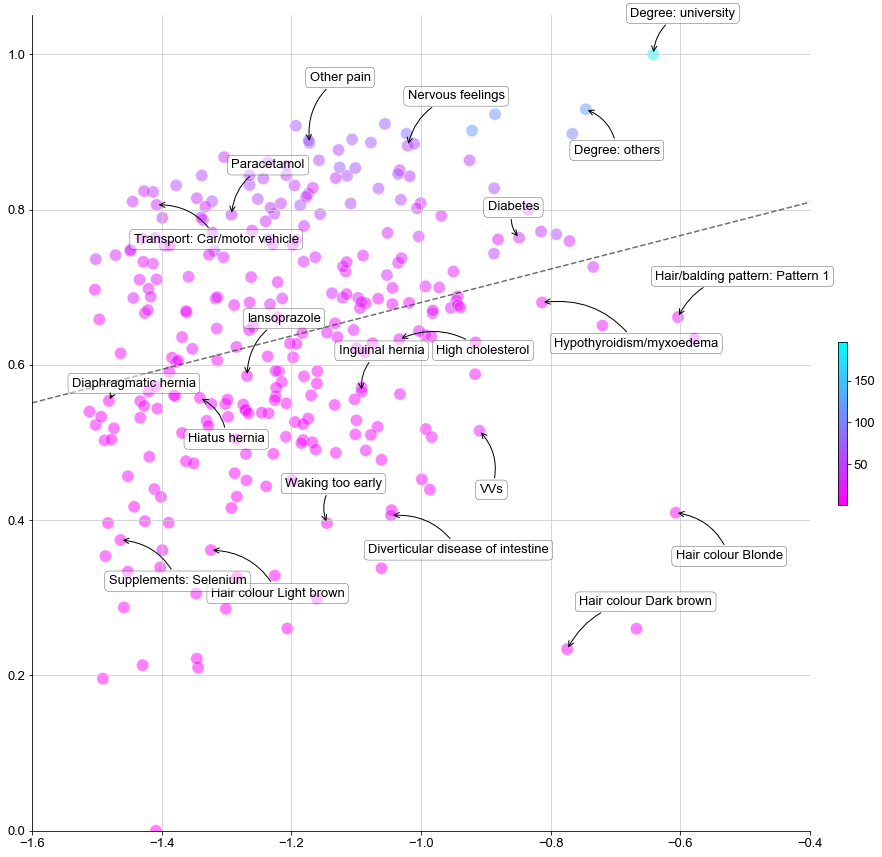

In [306]:
#phenotypes_par_filtered_description_dict=pd.read_csv(phenotypes_par_filtered_description_dict_path,sep='\t',index_col='description')
from numpy.polynomial.polynomial import polyfit

plt.rcParams["figure.figsize"] = (17,15)
plt.rcParams['font.size']=13


#h2bin_data_toplot=h2bin_data[np.logical_and.reduce([h2bin_data['h2_liability']==h2bin_data['h2_observed'],h2bin_data['h2_liability']>0.15,h2bin_data['h2_liability']<0.3])]
var_and_h2_filtered=var_and_h2[var_and_h2['uni.Total Liability scale h2']!=var_and_h2['uni.Total Observed scale h2']]

#var_and_h2_filtered=var_and_h2.copy()

var_and_h2_filtered['x_data']=np.log10(var_and_h2_filtered['uni.Total Liability scale h2'])
var_and_h2_filtered['y_data']=var_and_h2_filtered['bp8']
var_and_h2_filtered['hue_data']=-np.log10(var_and_h2_filtered['uni.Total h2 p'])
#np.log10(st.norm.sf(h2_total[idx]['{}.Total Observed scale h2'.format(suffix)]/h2_total[idx]['{}.Total Observed scale h2_se'.format(suffix)]))



points = plt.scatter(var_and_h2_filtered['x_data'],
                     var_and_h2_filtered['y_data'],
                     c=var_and_h2_filtered["hue_data"],
                     cmap="cool_r")
plt.clf()
plt.colorbar(points,orientation="vertical",pad=0.03,shrink=0.2)#,panchor=(-1,-1))

plot=sns.scatterplot(var_and_h2_filtered['x_data'],var_and_h2_filtered['y_data'],hue=var_and_h2_filtered['hue_data'],palette="cool_r",
                    legend=None,alpha=0.5,s=150
                    )
#sns.regplot(var_and_h2_filtered['x_data'],var_and_h2_filtered['y_data'],marker='')
x,y=var_and_h2_filtered['x_data'],var_and_h2_filtered['y_data']
b, m = polyfit(x, y, 1)

#plt.plot(x, y, '.')
#plt.plot(np.arange(-1.6,-0.4,0.01), b + m * np.arange(-1.6,-0.4,0.01), '-',c=(0.2,0.2,0.2,0.7))
plt.plot(np.arange(-1.6,-0.4,0.01), b + m * np.arange(-1.6,-0.4,0.01), '--',c=(0.2,0.2,0.2,0.7))


dup_sort=lambda x: sorted(np.append(x,-x),key=lambda y: abs(y))

#r_sample=dup_sort(np.arange(0.04,0.071,0.005))
r_sample=np.arange(0.06,0.08,0.01)
theta_sample=2*np.pi*np.arange(0,1,0.05)
theta_sample=theta_sample[theta_sample%np.pi>np.pi/4]

np.random.shuffle(theta_sample)
move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]


text_plotted=pd.DataFrame([])

var_and_h2['priority']=0
var_and_h2.loc['23115_irnt']['priority']=1
var_and_h2.loc['30100_irnt']['priority']=1
var_and_h2.loc['30110_irnt']['priority']=1
var_and_h2.loc['5132_irnt']['priority']=1

for idx,row in var_and_h2_filtered.sort_values('y_data',ascending=False).sort_values('priority',ascending=False).iterrows():
    description_short=description_to_short(row['description'],'abbr_pub')
    if type(description_short)==float:
        continue
    #plt.text(row['x_data'], row['y_data'], description_to_short(row['description'],'abbr_pub'))#, horizontalalignment='left', size='medium', color='black',)
    s=description_short
    xy=np.array([row['x_data'], row['y_data']])
    #np.random.shuffle(move_sample)
    np.random.shuffle(theta_sample)
    move_sample=[(r*np.cos(theta),r*np.sin(theta)) for theta in theta_sample for r in r_sample]
    
    for move in move_sample:
        xytext=xy+move
        #print(idx,xy)
        #(((text_dup[0]-row['h2_liability'])**2+(5*(text_dup[1]-row['cm8']))**2)<0.0007).sum()==0:
        if  row['priority']==1 or text_plotted.shape[0]==0 or ((((text_plotted['x']-xytext[0])**2+0.5*(text_plotted['y']-xytext[1])**2)<0.02).sum()==0 and xytext[1]<1):
            plt.annotate(s,xy=xy,xytext=xytext,arrowprops=dict(arrowstyle="- >",connectionstyle="arc3,rad=0.3"),bbox= dict(boxstyle="round,pad=0.3", fc=(1,1,1,0.5), ec="black", lw=0.3))
            text_plotted=text_plotted.append(pd.DataFrame([{'x':xytext[0],'y':xytext[1]}]))
            #print(description_short,xy,move,xytext)
            break

            
plt.grid(color=(0.8,0.8,0.8,0.1))
#plt.grid()
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.xlim(-1.6,-0.4)
plt.ylim(0,1.05)

sns.despine()

plt.show()

In [257]:
var_and_h2_filtered[var_and_h2_filtered.description.str.contains('width')]

,bp8,uni.Total Observed scale h2,uni.Total Liability scale h2,uni.Total h2 p,description,priority,x_data,y_data,hue_data
4100_irnt,0.838599,0.2271,0.2271,8.387339e-64,Ankle spacing width (left),0,-0.643783,0.838599,63.076376
3143_irnt,0.859852,0.2251,0.2251,1.103090e-71,Ankle spacing width,0,-0.647625,0.859852,70.957389
30110_irnt,0.665169,0.1810,0.1810,2.254452e-25,Platelet distribution width,0,-0.742321,0.665169,24.646959
30070_irnt,0.698081,0.1691,0.1691,1.556127e-30,Red blood cell (erythrocyte) distribution width,0,-0.771856,0.698081,29.807955


In [ ]:
per_bp_var['bp8']<0.7

In [ ]:
var_and_h2_filtered['uni.Total Liability scale h2']>0.2

In [284]:
np.logical_and.reduce([per_bp_var['bp8']>0.6,per_bp_var['bp8']<0.7,var_and_h2_filtered['uni.Total Liability scale h2']>0.2])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [296]:
a

,bp8,uni.Total Observed scale h2,uni.Total Liability scale h2,uni.Total h2 p,description,priority,x_data,y_data,hue_data
5099_irnt,0.616220,0.2774,0.2774,8.862494e-40,3mm weak meridian (right),0,-0.556894,0.616220,39.052444
30100_irnt,0.657843,0.2774,0.2774,7.753678e-23,Mean platelet (thrombocyte) volume,0,-0.556894,0.657843,22.110492
5132_irnt,0.639649,0.2654,0.2654,4.160960e-40,3mm strong meridian (right),0,-0.576099,0.639649,39.380806
30040_irnt,0.685793,0.2050,0.2050,6.515068e-27,Mean corpuscular volume,0,-0.688246,0.685793,26.186081
5257_irnt,0.697091,0.1881,0.1881,7.769430e-37,Corneal resistance factor (right),0,-0.725611,0.697091,36.109611
5265_irnt,0.696254,0.1814,0.1814,7.728154e-35,Corneal resistance factor (left),0,-0.741363,0.696254,34.111924
30110_irnt,0.665169,0.1810,0.1810,2.254452e-25,Platelet distribution width,0,-0.742321,0.665169,24.646959
30070_irnt,0.698081,0.1691,0.1691,1.556127e-30,Red blood cell (erythrocyte) distribution width,0,-0.771856,0.698081,29.807955
30270_irnt,0.688568,0.1601,0.1601,1.448287e-26,Mean sphered cell volume,0,-0.795609,0.688568,25.839146
30260_irnt,0.636810,0.1601,0.1601,1.448287e-26,Mean reticulocyte volume,0,-0.795609,0.636810,25.839146


In [295]:
a=var_and_h2_filtered[np.logical_and(per_bp_var['bp8']>0.6,per_bp_var['bp8']<0.7)]
a[a['uni.Total Liability scale h2']>0.2]

/home/ch6845/tools/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,bp8,uni.Total Observed scale h2,uni.Total Liability scale h2,uni.Total h2 p,description,priority,x_data,y_data,hue_data
5099_irnt,0.616220,0.2774,0.2774,8.862494e-40,3mm weak meridian (right),0,-0.556894,0.616220,39.052444
30100_irnt,0.657843,0.2774,0.2774,7.753678e-23,Mean platelet (thrombocyte) volume,0,-0.556894,0.657843,22.110492
5132_irnt,0.639649,0.2654,0.2654,4.160960e-40,3mm strong meridian (right),0,-0.576099,0.639649,39.380806
30040_irnt,0.685793,0.2050,0.2050,6.515068e-27,Mean corpuscular volume,0,-0.688246,0.685793,26.186081


In [272]:
h2_total[h2_total['description'].str.contains('3mm')]

,bp300.filename,bp300.Total Observed scale h2,bp300.Total Observed scale h2_se,bp300.Total Liability scale h2,bp300.Total Liability scale h2_se,bp300.Lambda GC,bp300.Mean Chi^2,bp300.Intercept,bp300.Intercept_se,bp300.Ratio,...,uni.Total Liability scale h2,uni.Total Liability scale h2_se,uni.Lambda GC,uni.Mean Chi^2,uni.Intercept,uni.Intercept_se,uni.Ratio,uni.Total h2 z,uni.Total h2 p,description
phenotype,,,,,,,,,,,,,,,,,,,,,
5099_irnt,data/out_final/bp300.5099_irnt.ldsc.log,0.2733,0.0223,0.2733,0.0223,1.3374,1.5699,1.1121,0.0167,0.1966 (0.0293),...,0.2774,0.0211,1.3409,1.5898,1.1201,0.0140,0.2036 (0.0237),13.146919,8.862494e-40,3mm weak meridian (right)
5132_irnt,data/out_final/bp300.5132_irnt.ldsc.log,0.2599,0.0215,0.2599,0.0215,1.3238,1.5426,1.1113,0.0166,0.2052 (0.0306),...,0.2654,0.0201,1.3238,1.5630,1.1185,0.0136,0.2104 (0.0242),13.203980,4.160960e-40,3mm strong meridian (right)
5116_irnt,data/out_final/bp300.5116_irnt.ldsc.log,0.0687,0.0077,0.0687,0.0077,1.1207,1.1409,1.0185,0.0069,0.1313 (0.0487),...,0.0669,0.0077,1.1207,1.1409,1.0205,0.0070,0.1453 (0.0497),8.688312,1.839327e-18,3mm cylindrical power (right)
5119_irnt,data/out_final/bp300.5119_irnt.ldsc.log,0.0538,0.0068,0.0538,0.0068,1.1113,1.1246,1.0283,0.0071,0.2274 (0.0568),...,0.0512,0.0066,1.1113,1.1246,1.0308,0.0071,0.2468 (0.0566),7.757576,4.328408e-15,3mm cylindrical power (left)
5104_irnt,data/out_final/bp300.5104_irnt.ldsc.log,0.0527,0.0074,0.0527,0.0074,1.0957,1.1147,1.0206,0.0075,0.1795 (0.0656),...,0.0498,0.0068,1.0957,1.1147,1.0230,0.0073,0.2008 (0.0637),7.323529,1.207663e-13,3mm strong meridian angle (left)
5111_irnt,data/out_final/bp300.5111_irnt.ldsc.log,0.0401,0.0067,0.0401,0.0067,1.0802,1.0871,1.0179,0.0064,0.2058 (0.0733),...,0.0381,0.0065,1.0802,1.0871,1.0195,0.0062,0.2235 (0.0709),5.861538,2.292991e-09,3mm asymmetry angle (left)
5107_irnt,data/out_final/bp300.5107_irnt.ldsc.log,0.0392,0.0063,0.0392,0.0063,1.0957,1.1059,1.0353,0.0058,0.3329 (0.055),...,0.0363,0.0059,1.0957,1.1059,1.0380,0.0058,0.3586 (0.055),6.152542,3.812529e-10,3mm strong meridian angle (right)
5108_irnt,data/out_final/bp300.5108_irnt.ldsc.log,0.0341,0.0067,0.0341,0.0067,1.0772,1.0836,1.0198,0.0066,0.2372 (0.079),...,0.0343,0.0066,1.0772,1.0836,1.0197,0.0068,0.2359 (0.0813),5.196970,1.012817e-07,3mm asymmetry angle (right)
5160_irnt,data/out_final/bp300.5160_irnt.ldsc.log,0.0313,0.0068,0.0313,0.0068,1.0466,1.0673,1.0104,0.0072,0.1546 (0.1077),...,0.0313,0.0067,1.0466,1.0673,1.0104,0.0072,0.1553 (0.1075),4.671642,1.494009e-06,3mm regularity index (right)


In [204]:
x,y=var_and_h2_filtered['x_data'],var_and_h2_filtered['y_data']

In [206]:
np.corrcoef(x,y)

array([[1.       , 0.3202334],
       [0.3202334, 1.       ]])

In [208]:
var_and_h2_filtered.corr()

,bp8,uni.Total Observed scale h2,uni.Total Liability scale h2,uni.Total h2 p,priority,x_data,y_data,hue_data
bp8,1.000000,0.276076,0.276076,-0.428782,NaN,0.320233,1.000000,0.790563
uni.Total Observed scale h2,0.276076,1.000000,1.000000,-0.105016,NaN,0.954679,0.276076,0.354261
uni.Total Liability scale h2,0.276076,1.000000,1.000000,-0.105016,NaN,0.954679,0.276076,0.354261
uni.Total h2 p,-0.428782,-0.105016,-0.105016,1.000000,NaN,-0.120122,-0.428782,-0.180587
priority,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x_data,0.320233,0.954679,0.954679,-0.120122,NaN,1.000000,0.320233,0.400407
y_data,1.000000,0.276076,0.276076,-0.428782,NaN,0.320233,1.000000,0.790563
hue_data,0.790563,0.354261,0.354261,-0.180587,NaN,0.400407,0.790563,1.000000


In [213]:
var_and_h2_filtered.corr()

,bp8,uni.Total Observed scale h2,uni.Total Liability scale h2,uni.Total h2 p,priority,x_data,y_data,hue_data
bp8,1.000000,0.276076,0.276076,-0.428782,NaN,0.276076,1.000000,0.790563
uni.Total Observed scale h2,0.276076,1.000000,1.000000,-0.105016,NaN,1.000000,0.276076,0.354261
uni.Total Liability scale h2,0.276076,1.000000,1.000000,-0.105016,NaN,1.000000,0.276076,0.354261
uni.Total h2 p,-0.428782,-0.105016,-0.105016,1.000000,NaN,-0.105016,-0.428782,-0.180587
priority,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x_data,0.276076,1.000000,1.000000,-0.105016,NaN,1.000000,0.276076,0.354261
y_data,1.000000,0.276076,0.276076,-0.428782,NaN,0.276076,1.000000,0.790563
hue_data,0.790563,0.354261,0.354261,-0.180587,NaN,0.354261,0.790563,1.000000
